In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Black Box Function (Function to optimize) (Bukin Function N. 6)
def target(x, y):
    return  -(100 * np.sqrt(abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10))

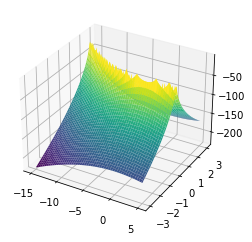

In [14]:
x = np.linspace(-15, 5, 100).reshape(-1, 1)
y = np.linspace(-3, 3, 100).reshape(-1, 1)
X,Y = np.meshgrid(x, y)

# Evaluate the target function on the grid
Z = target(X, Y)

# Visualization of results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

In [15]:
# Defining Function Bounds
pbounds = {'x': (-35, 35), 'y':(-35, 35)} 

# Constrained Technique --> Finds the best possible solution within a defined set of limitations or contraints 
# Ensure search is confined to a feasible and relevant region of the parameter space

In [16]:
optimizer = BayesianOptimization(f=target, pbounds=pbounds, random_state=27)

In [17]:
# Set Acquisition Function (Expected Improvement)
acq_function = UtilityFunction(kind="ucb", kappa=5)
optimizer.maximize(
    init_points=2, # Number of BayesOpt Steps. More Steps --> Finding better maximum
      n_iter=0,    # Number of random exploration steps. Diversifies exploration spacee. 
      acquisition_function = acq_function
      )

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -466.4    | -5.2      | 22.02     |
| 2         | -480.3    | 16.48     | 25.76     |


In [18]:
optimizer.maximize(init_points=0, n_iter=1)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 3         | -455.4    | -6.146    | 21.11     |


In [19]:
optimizer.maximize(init_points=3, n_iter=5)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 4         | -573.6    | -8.163    | 33.56     |
| 5         | -528.5    | 27.52     | -20.32    |
| 6         | -292.7    | 16.93     | 11.42     |
| 7         | -207.1    | 11.08     | 5.508     |
| 8         | -219.3    | -1.891    | -4.772    |
| 9         | -532.3    | -30.03    | -19.3     |
| 10        | -257.6    | 9.418     | -5.737    |
| 11        | -197.4    | 1.14      | 3.905     |


In [20]:
# Output best combination of parameters to test next
print(optimizer.max)

{'target': -197.40332646609778, 'params': {'x': 1.1402735577890155, 'y': 3.905412554794856}}


In [21]:
next_point_to_probe = optimizer.suggest(acq_function)
print("Next point to probe is:", next_point_to_probe)

Next point to probe is: {'x': -2.5105109426664605, 'y': -35.0}


In [22]:
target = target(**next_point_to_probe)
print("Found the target value to be:", target)

Found the target value to be: -592.2153060426284
